In [1]:
  from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np



**READING THE DATA FRAME**

In [3]:
df = pd.read_csv('/content/drive/My Drive/datasets/statlog-heart-dataset.csv')

df.head()

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes


**TRAINING EXAMPLES**

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


**--- LEARNING THE RF CLASSIFIER**

In [5]:
from sklearn.inspection import PartialDependenceDisplay

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

### **PERMUTATION FEATURE IMPORTANCE**

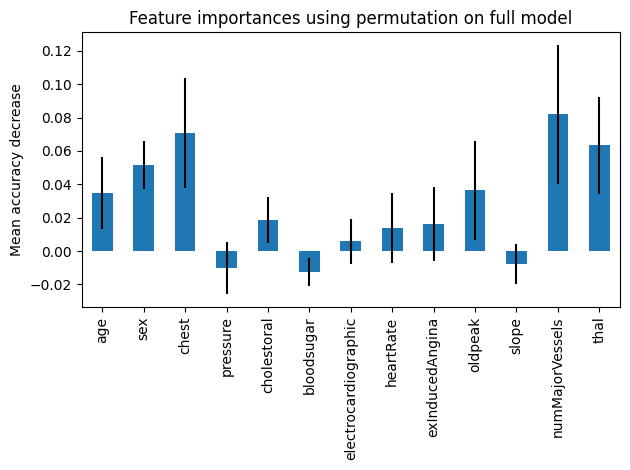

In [10]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()